Kuo Yang, Lab 8, 12/7/25  
CS 121/Python DSML  
East Los Angeles College, FA 2025

In [174]:
#basic libs
import numpy as np
import pandas as pd

#plotting
import matplotlib.pyplot as plt
#import seaborn as sns

#trees
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression

## 1: Creating and exploring pandas data series

In [175]:
glp1=pd.read_csv('glp1df.csv') #not sure why, but if I include encoding='latin1' I lose some data in api1 column
print(glp1.shape)

(300554, 25)


In [176]:
glp1.head()

,Case ID,Suspect Product Names,Suspect Product Active Ingredients,Reason for Use,Reactions,Serious,Outcomes,Sex,Event Date,Latest FDA Received Date,...,Report Source,Concomitant Product Names,Latest Manufacturer Received Date,Initial FDA Received Date,Country where Event occurred,Reported to Manufacturer?,Manufacturer Control Number,Literature Reference,Compounded Flag,api1
0,25142581,Trulicity,Dulaglutide,Product Used For Unknown Indication,Injection Site Pain,Non-Serious,Non-Serious,Male,-,31-MAR-2025,...,Not Specified,-,24-MAR-2025,31-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503021448,-,-,1
1,25142580,Trulicity,Dulaglutide,Type 2 Diabetes Mellitus,Visual Impairment;Product Storage Error,Non-Serious,Non-Serious,Female,-,31-MAR-2025,...,Not Specified,-,24-MAR-2025,31-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503021444,-,-,1
2,25141349,Trulicity,Dulaglutide,Product Used For Unknown Indication,Inappropriate Schedule Of Product Administrati...,Non-Serious,Non-Serious,Male,25-MAR-2025,31-MAR-2025,...,Not Specified,-,28-MAR-2025,31-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503025775,-,-,1
3,25140677,Trulicity,Dulaglutide,Type 2 Diabetes Mellitus,Depression;Decreased Appetite;Schizophrenia;Ma...,Serious,Hospitalized,Female,DEC-2024,31-MAR-2025,...,Not Specified,-,25-MAR-2025,31-MAR-2025,JP,Not Specified,JP-ELI_LILLY_AND_COMPANY-JP202503002636,-,-,1
4,25140673,Trulicity,Dulaglutide,Product Used For Unknown Indication,Paraesthesia,Non-Serious,Non-Serious,Female,-,31-MAR-2025,...,Not Specified,-,27-MAR-2025,31-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503024471,-,-,1


In [177]:
glp1.columns

Index(['Case ID', 'Suspect Product Names',
       'Suspect Product Active Ingredients', 'Reason for Use', 'Reactions',
       'Serious', 'Outcomes', 'Sex', 'Event Date', 'Latest FDA Received Date',
       'Case Priority', 'Patient Age', 'Patient Weight', 'Sender',
       'Reporter Type', 'Report Source', 'Concomitant Product Names',
       'Latest Manufacturer Received Date', 'Initial FDA Received Date',
       'Country where Event occurred', 'Reported to Manufacturer?',
       'Manufacturer Control Number', 'Literature Reference',
       'Compounded Flag', 'api1'],
      dtype='object')

### <span style="color:red;">Standardizing Year. (Courtesy of Ramirez,J of ELAC) </span>


In [178]:

UNIT_MAP = {
    'yr': 'year', 'yrs': 'year', 'y': 'year', 'year': 'year', 'years': 'year',
    'day': 'day', 'days': 'day', 'd': 'day',
    'week': 'week', 'weeks': 'week', 'wk': 'week', 'wks': 'week',
    'mth': 'month', 'mon': 'month', 'month': 'month', 'months': 'month', 'mo': 'month',
    'dec': 'decade', 'decade': 'decade', 'decades': 'decade'
}

In [179]:
import re

def parse_age_to_years(val):
    # handle missing/unknown
    if pd.isna(val):
        return np.nan
    s = str(val).strip().lower()
    if s in ('', 'nan', 'none', 'not specified', 'unknown'):
        return np.nan

    # grab first number (allow decimals)
    mnum = re.search(r'(\d+(\.\d+)?)', s)
    if not mnum:
        return np.nan
    num = float(mnum.group(1))

    # find a recognizable unit token, prefer the last token in the string
    toks = re.findall(r'[a-z]+', s)
    unit_std = None
    for tok in reversed(toks):
        if tok in UNIT_MAP:
            unit_std = UNIT_MAP[tok]
            break

    # convert to years
    if unit_std in (None, 'year'):
        years = num
    elif unit_std == 'month':
        years = num / 12.0
    elif unit_std == 'week':
        years = num / 52.0
    elif unit_std == 'day':
        years = num / 365.0
    elif unit_std == 'decade':
        years = num * 10.0
    else:
        years = np.nan

    return years

### <span style="color:red;">Age_Years (Courtesy of Ramirez,J, ELAC) </span>


In [180]:
glp1['Age_Years'] = glp1['Patient Age'].apply(parse_age_to_years)
print(glp1[['Patient Age', 'Age_Years']])


       Patient Age  Age_Years
0            80 YR       80.0
1            80 YR       80.0
2            85 YR       85.0
3            71 YR       71.0
4            63 YR       63.0
...            ...        ...
300549       55 YR       55.0
300550       32 YR       32.0
300551       49 YR       49.0
300552       74 YR       74.0
300553       32 YR       32.0

[300554 rows x 2 columns]


Age and Weight Clean

In [181]:
glp1['Weight1']=pd.to_numeric(glp1['Patient Weight'].str.replace('[^\\d.]','',regex=True),errors='coerce')

#filter in age between 0 and 150, weight <300kg
glp1_2=glp1.query('Age_Years > 0 & Age_Years < 150 & Weight1 < 300').copy()
print(glp1_2)

         Case ID Suspect Product Names Suspect Product Active Ingredients  \
7       25139513     Trulicity;Ozempic            Semaglutide;Dulaglutide   
12      25138398     Trulicity;Humalog         Insulin Lispro;Dulaglutide   
18      25138045     Humalog;Trulicity         Dulaglutide;Insulin Lispro   
49      24970509             Trulicity                        Dulaglutide   
50      24798740             Trulicity                        Dulaglutide   
...          ...                   ...                                ...   
300549  24904201                     -             Pyridoxine\Tirzepatide   
300550  24642147                     -             Pyridoxine\Tirzepatide   
300551  24398076                     -             Pyridoxine\Tirzepatide   
300552  24327525                     -             Pyridoxine\Tirzepatide   
300553  24129001                     -            Niacinamide\Tirzepatide   

                                           Reason for Use  \
7       Blood 

###Compounded Data Map (new column: CMPD)

In [182]:
glp1_2['Compounded Flag'].unique()

array(['-', 'Yes'], dtype=object)

In [183]:
#create column cmpd, where 1=yes, 2=no (-)
glp1_2['CMPD'] = glp1_2['Compounded Flag'].map({'Yes': 1, '-': 0})

In [184]:
glp1_2.head()

,Case ID,Suspect Product Names,Suspect Product Active Ingredients,Reason for Use,Reactions,Serious,Outcomes,Sex,Event Date,Latest FDA Received Date,...,Initial FDA Received Date,Country where Event occurred,Reported to Manufacturer?,Manufacturer Control Number,Literature Reference,Compounded Flag,api1,Age_Years,Weight1,CMPD
7,25139513,Trulicity;Ozempic,Semaglutide;Dulaglutide,Blood Cholesterol Increased;Gastrooesophageal ...,Decreased Appetite;Impaired Gastric Emptying,Serious,Other Outcomes;Hospitalized,Female,01-DEC-2022,31-MAR-2025,...,31-MAR-2025,US,Not Specified,US-NOVOPROD-1319160,-,-,1,44.0,79.365,0
12,25138398,Trulicity;Humalog,Insulin Lispro;Dulaglutide,Product Used For Unknown Indication,Haemorrhage,Non-Serious,Non-Serious,Female,09-MAR-2025,30-MAR-2025,...,30-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503022358,-,-,1,89.0,86.168,0
18,25138045,Humalog;Trulicity,Dulaglutide;Insulin Lispro,Product Used For Unknown Indication,Haemorrhage,Non-Serious,Non-Serious,Female,18-MAR-2025,29-MAR-2025,...,29-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503021035,-,-,1,62.0,77.564,0
49,24970509,Trulicity,Dulaglutide,Type 2 Diabetes Mellitus,Nausea;Dyspepsia;Decreased Appetite;Diarrhoea;...,Serious,Other Outcomes,Female,01-APR-2022,27-MAR-2025,...,14-FEB-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202502002666,-,-,1,41.0,136.050,0
50,24798740,Trulicity,Dulaglutide,Asthma;Deep Vein Thrombosis;Depression;Diabete...,Vomiting;Nausea;Diarrhoea;Constipation;Abdomin...,Serious,Hospitalized;Other Outcomes,Female,08-SEP-2022,27-MAR-2025,...,02-JAN-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202412018435,-,-,1,69.0,150.000,0


In [185]:
#Sex2
glp1_2['Sex2'] = glp1_2['Sex'].map({'Female': 1, 'Male': 0})
#Serious2
glp1_2['Serious2'] = glp1_2['Serious'].map({'Serious': 1, 'Non-Serious': 0})

In [186]:
glp1_2.head()

,Case ID,Suspect Product Names,Suspect Product Active Ingredients,Reason for Use,Reactions,Serious,Outcomes,Sex,Event Date,Latest FDA Received Date,...,Reported to Manufacturer?,Manufacturer Control Number,Literature Reference,Compounded Flag,api1,Age_Years,Weight1,CMPD,Sex2,Serious2
7,25139513,Trulicity;Ozempic,Semaglutide;Dulaglutide,Blood Cholesterol Increased;Gastrooesophageal ...,Decreased Appetite;Impaired Gastric Emptying,Serious,Other Outcomes;Hospitalized,Female,01-DEC-2022,31-MAR-2025,...,Not Specified,US-NOVOPROD-1319160,-,-,1,44.0,79.365,0,1.0,1
12,25138398,Trulicity;Humalog,Insulin Lispro;Dulaglutide,Product Used For Unknown Indication,Haemorrhage,Non-Serious,Non-Serious,Female,09-MAR-2025,30-MAR-2025,...,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503022358,-,-,1,89.0,86.168,0,1.0,0
18,25138045,Humalog;Trulicity,Dulaglutide;Insulin Lispro,Product Used For Unknown Indication,Haemorrhage,Non-Serious,Non-Serious,Female,18-MAR-2025,29-MAR-2025,...,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503021035,-,-,1,62.0,77.564,0,1.0,0
49,24970509,Trulicity,Dulaglutide,Type 2 Diabetes Mellitus,Nausea;Dyspepsia;Decreased Appetite;Diarrhoea;...,Serious,Other Outcomes,Female,01-APR-2022,27-MAR-2025,...,Not Specified,US-ELI_LILLY_AND_COMPANY-US202502002666,-,-,1,41.0,136.050,0,1.0,1
50,24798740,Trulicity,Dulaglutide,Asthma;Deep Vein Thrombosis;Depression;Diabete...,Vomiting;Nausea;Diarrhoea;Constipation;Abdomin...,Serious,Hospitalized;Other Outcomes,Female,08-SEP-2022,27-MAR-2025,...,Not Specified,US-ELI_LILLY_AND_COMPANY-US202412018435,-,-,1,69.0,150.000,0,1.0,1


In [187]:
#api1
print(glp1_2['api1'].dtype)

int64


End of Datasetup (Use glp1_2)

---
Start Tree Analysis


## Tree Analysis

In [188]:
# 3. Define input features and output
X = glp1_2[["Age_Years", "Sex2","api1","CMPD",'Weight1']]
y = glp1_2["Serious2"]

In [189]:
# 4. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1,stratify=y)

In [190]:
# 5. Train the decision tree model, tree1=model (age, sex, api, cmpd, weight)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [191]:
# 6. Predict and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", round(accuracy, 2))

Accuracy: 0.82


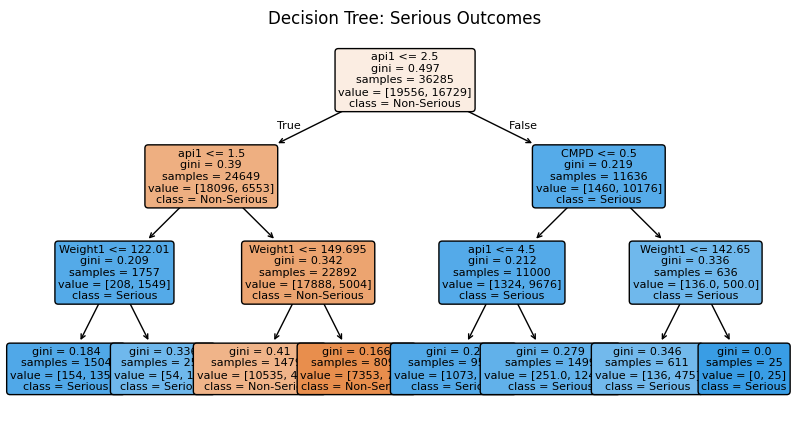

In [192]:
# 7. Visualize the decision tree
plt.figure(figsize=(10, 5))
plot_tree(
    model,
    feature_names=X.columns,       # Labels for the inputs (Income, Credit_Score)
    class_names=["Non-Serious", "Serious"],     # 0 = No, 1 = Yes
    filled=True,                   # Color based on prediction
    rounded=True,                  # Softer box edges
    fontsize=8                    # Bigger font for readability
)
plt.title("Decision Tree: Serious Outcomes")
plt.show()


It looks like the only important predictor of outcome is if GLP-1 is exenatide, in which case the outcome is non-serious. Let's make another tree where the only feature included is GLP-1 (api1). Accuracy of this tree is 0.81

In [193]:
# Define input features and output
X2 = glp1_2[["api1"]]
y2 = glp1_2["Serious2"]

In [194]:
# Split into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,
                                                        random_state=1, stratify=y)

In [195]:
# Train the decision tree model, tree1=model (api1)
model2 = DecisionTreeClassifier(max_depth=3, random_state=42)
model2.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [196]:
# Predict and evaluate
predictions2 = model2.predict(X2_test)
accuracy2 = accuracy_score(y2_test, predictions2)
print("Accuracy:", round(accuracy2, 2))

Accuracy: 0.82


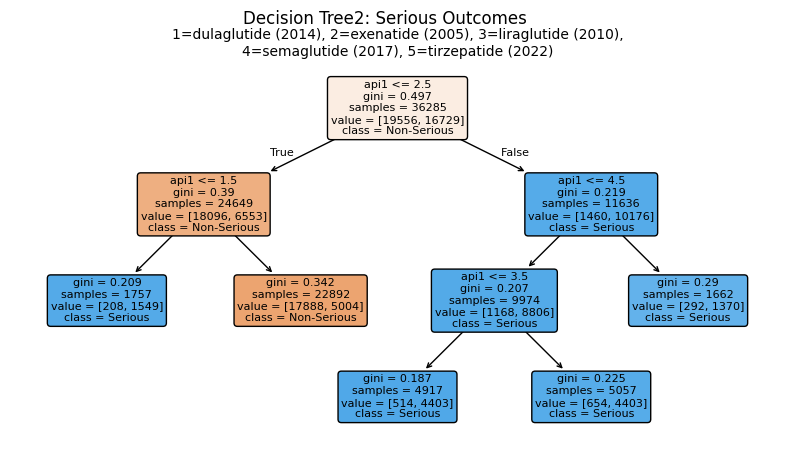

In [197]:
# 7. Visualize the decision tree
plt.figure(figsize=(10, 5))
plot_tree(
    model2,
    feature_names=X2.columns,       # Labels for the inputs (Income, Credit_Score)
    class_names=["Non-Serious", "Serious"],     # 0 = No, 1 = Yes
    filled=True,                   # Color based on prediction
    rounded=True,                  # Softer box edges
    fontsize=8                    # Bigger font for readability
)
plt.suptitle("Decision Tree2: Serious Outcomes")
plt.title('1=dulaglutide (2014), 2=exenatide (2005), 3=liraglutide (2010),\n4=semaglutide (2017), 5=tirzepatide (2022)',
          fontsize=10,y=0.99)
plt.show()


Even with all the features except for GLP-1 (api1) removed, the results of the tree are still the same: if GLP-1 is exenatide (api1=2), then it is a non-serious outcome. accuracy still same at 0.81. Taking the left last leaf as an example: gini of 0.209 means a purity index of 0.209, where 0 is perfect purity and 0.5 is complete mixture. Gini started from ~0.5 at the top and decreased to 0.209 - the decision tree was able to distinguish between serious vs non-serious events using these decision points on the tree. Using the decision tree, that leaf has a 0.209 chance of incorrectly classifying a case as serious vs. non-serious. Sample means the number of events in that leaf. Value is the number of cases in each class in that leaf, i.e. 208 non-serious cases and 1549 serious cases. class=serious identifies that leaf as serious events classification.

In [198]:
#create an array with name of api1 and elements 1 through 5
a = {'api1':[1,2,3,4,5]}
b=pd.DataFrame(a)
print(b)

   api1
0     1
1     2
2     3
3     4
4     5


In [199]:
model2.predict(b)

array([1, 0, 1, 1, 1])

Just as the tree predicted, the model will predict serious for every GLP-1 except for exenatide (api1=2), where it will classify as non-serious.

##Random Forest

In [200]:
# 3. Define features (X) and target (y)
X = glp1_2[["Age_Years", "Sex2","api1","CMPD",'Weight1']]
y = glp1_2["Serious2"]

# 4. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,stratify=y
)

# 5. Create and train the Random Forest model
model = RandomForestClassifier(
    n_estimators=100,   # number of trees
    max_depth=3,       # limit depth to reduce overfitting
    random_state=42
)
model.fit(X_train, y_train)

# 6. Evaluate accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {acc:.2f}")

Accuracy on test set: 0.82


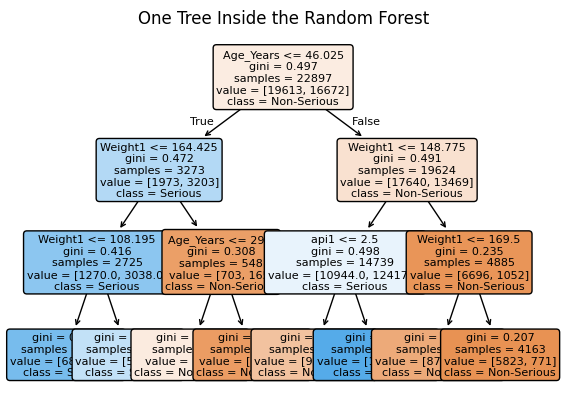

In [201]:
# Pick the first tree from the forest
one_tree = model.estimators_[10]

plot_tree(
    one_tree,
    feature_names=["Age_Years", "Sex2","api1","CMPD",'Weight1'],
    class_names=["Non-Serious", "Serious"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("One Tree Inside the Random Forest")
plt.show()

In [202]:
# 8. Feature importance (which feature matters more?)
importances = model.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
})
print("\nFeature importance:")
print(feat_imp)


Feature importance:
     Feature  Importance
0  Age_Years    0.033964
1       Sex2    0.003723
2       api1    0.662462
3       CMPD    0.009982
4    Weight1    0.289868


From the random forest, it looks like the accuracy is very similar (0.82) to the tree (0.82), so I don't think the forest adds any additional information. It does confirm the relative importance of GLP-1 (api1) and Weight.

## Logistic Regression

In [203]:
#Pre-Process Data
#glp1_agewt=glp1[['Age_Years','Weight1','Serious','Sex','Year1']]
glp1_3=glp1_2[['Serious2','Age_Years','Sex2','api1','CMPD','Weight1']]
glp1_4=glp1_3.dropna()
print(glp1_4)

        Serious2  Age_Years  Sex2  api1  CMPD  Weight1
7              1       44.0   1.0     1     0   79.365
12             0       89.0   1.0     1     0   86.168
18             0       62.0   1.0     1     0   77.564
49             1       41.0   1.0     1     0  136.050
50             1       69.0   1.0     1     0  150.000
...          ...        ...   ...   ...   ...      ...
300549         1       55.0   1.0     5     1   67.500
300550         1       32.0   1.0     5     1   92.250
300551         1       49.0   1.0     5     1   62.550
300552         0       74.0   1.0     5     1   86.400
300553         1       32.0   1.0     5     1   93.600

[51575 rows x 6 columns]


In [204]:
#Define feature and target
X = glp1_4[["Age_Years",'Weight1']]
y = glp1_4["Serious2"]

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [205]:
# create and train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [206]:
# make predictions
y_pred = model.predict(X_test)

# evaluate model
acc = accuracy_score(y_test, y_pred)

print("\nAccuracy:", acc)


Accuracy: 0.646610224261617


In [207]:
coef= pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

print(coef)

     Feature  Coefficient
0  Age_Years    -0.028724
1    Weight1    -0.015984


Just out of curiosity I wanted to see if Age and Weight (the only available continuous variables in my dataset) are important variables in predicting outcome. It turns out they are not - accuracy is low at 0.65 (slightly better than a coin flip), with the coefficients being near zero (age=-0.03 and weight=-0.02).

## Conclusions

In this exercise, I tried to see if there's any predictor of serious events, e.g. over certain age, or over certain weight, certain sex, etc... It turns out the only reliable predicter is GLP-1, where if it's exenatide, then chances are the event will be non-serious; otherwise it is serious for all others. Using this simple algorithm, the accuracy achieved was 0.82. I'm not sure what conclusions to draw from this. I'm not comfortable saying that exenatide is safer than the others, because there are many confounding variables. I'd have to look at the data and see if the proportion of exenatide reports = non-serious are different from the other GLP-1s. This is somewhat interesting because exenatide is the first approved GLP-1 back in ~2006. If the decision tree end up being real and there's no problems with the underlying data, then: a) exenatide when first approved was dosed twice daily (bid sq), compared to once weekly for all the others. This brings up adherence - perhaps it was just due to people not taking it as required.  

It's interesting to note that all the various models agreed on the importance of GLP-1 (and maybe weight) in determining seriousness of events, while the others (sex, age, compounding) were unimportant.

## Testing/scratch Area

Caveats:
* No rate information can be inferred without total Rx dispensed
* Correlation is not causation

Disclaimer:
Please note that this was developed for academic coursework, and is intended for educational purposes ONLY. The information provided does NOT imply causation, safety, or efficacy. This is not medical advice and should not be used to diagnose, treat, cure, or prevent any disease. Always consult a qualified healthcare professional for any health-related concerns. No guarantees are made regarding the completeness, accuracy, or timeliness of the information provided. Full disclaimer: (https://www.fda.gov/drugs/fdas-adverse-event-reporting-system-faers/fda-adverse-event-reporting-system-faers-public-dashboard)